
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Forside.ipynb" target="_self"> <h2> &uarr; Tilbake til forsiden</h2></a>
    </div>
  </div>
</nav>

# Dataanalyse med Python

**Læringsmål:**
* Grunnleggende analyse av datasett
* Abstraksjon av funksjoner

**Oversikt:**
* [Oppgave a) ekstremverdier](#oppg_8a)
* [Oppgave b) matching av data](#oppg_8b)
* [Oppgave c) generalisering av funksjoner](#oppg_8c)
* [Oppgave d) behandling av store datasett](#oppg_8d)


## Intro til datasett med tidevannsmålinger

Et anvendelsesområde for Python som er aktuelt for mange ingeniørfag er dataanalyse. La oss si at vi tar målinger av havnivået i Ålesund over ett døgn for å kartlegge flo og fjære i denne tidsperioden. Da vil man typisk føre opp klokkeslett og målt havnivå i en slags tabell.

| Klokkeslett | Havnivå (cm) |
| --- | --- |
|00:00|180.5|
|01:00|192.8|
|02:00|190.4|
|$\ \vdots$|$\ \vdots$|
|23:00|129.2|


Med python kan vi bruke f.eks. lister til holde oversikt over denne dataen, der vi har én liste for kolonnen med klokkeslett, og en annen liste for kolonnen med havnivåmålinger.

In [1]:
waterlevel_data = [180.5, 192.8, 190.4, 176.8, 144.7, 104.8,  
                    73.9,  55.0,  53.3,  62.6,  87.8, 125.1,
                   156.0, 178.9, 183.1, 173.4, 152.3, 119.6, 
                    89.5,  68.5,  66.7,  75.0,  96.3, 129.2]

timestamps = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', 
              '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', 
              '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', 
              '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

Gitt listene over, kan vi for eksempel lage en graf som viser havnivået over tid med bruk av matpotlib slik kodecellen under gjør.<br>
*PS: kodeeksempelet bruker litt spesielle funksjoner for å bl.a. kunne skrive klokkeslett langs x-aksen med rotert tekst. Dette er ikke pensum, men heller et eksempel på hva som er mulig å gjøre.*

Text(0.5, 1.0, 'Havnivå i Ålesund i løpet av et døgn')

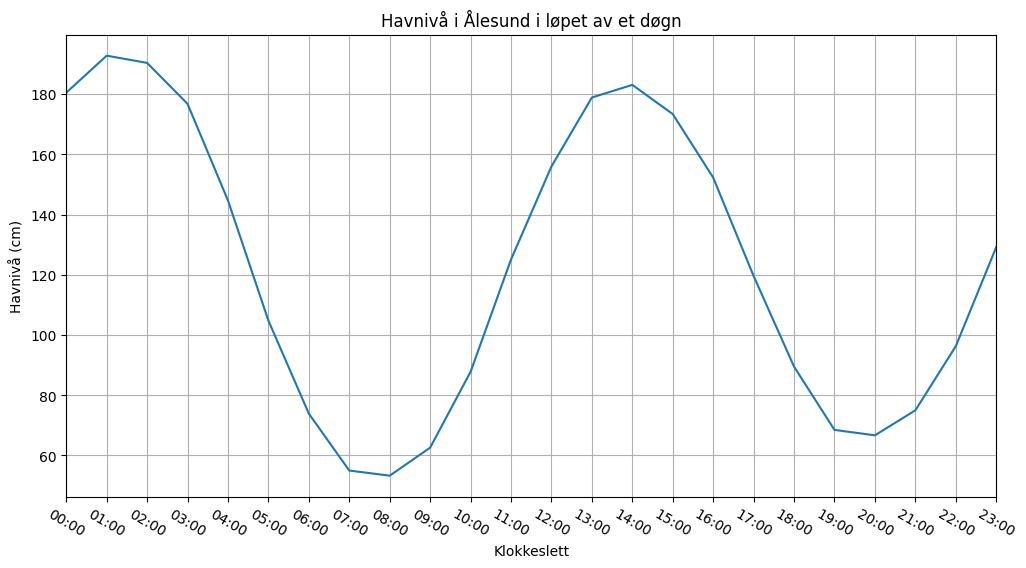

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Kode for å lage plott av havnivå ut ifra klokkeslett.
plt.figure(figsize=(12,6))  # Sett opp en tom figur med bredde 16 og høyde 6
plt.plot(waterlevel_data)   # Plott tidevannsdata
plt.xticks(np.arange(len(timestamps)), timestamps, rotation=-30); # Merk x-aksen med klokkeslett
plt.margins(x=0) # Fjern marginene i x-retning
plt.grid(True)   # Slå på rutenett
plt.xlabel("Klokkeslett")
plt.ylabel("Havnivå (cm)")
plt.title("Havnivå i Ålesund i løpet av et døgn")

Noe som også er aktuelt i dataanalyse er å hente ut nøkkelinformasjon som man eventuelt skulle ha interesse av fra et datasett automatisk, uten å måtte studere en tabell eller et plott manuelt. Vi skal nå ta for oss et par scenario der vi tar i bruk dataen i listene `waterlevel_data` og `timestamps`.

<a id="oppg_8a"></a>
## a)
Du skal nå bruke python til å finne ut hva som var det høyeste og det laveste havnivået som ble målt i løpet av de 24 timene. For å få til dette er det spesielt to funksjoner i `numpy`-biblioteket som kan komme godt med:
- [`numpy.max()`](https://numpy.org/doc/stable/reference/generated/numpy.max.html), som finner ut hva den høyeste tallverdien i en liste med tall er.
- [`numpy.min()`](https://numpy.org/doc/stable/reference/generated/numpy.min.html), som finner ut hva den laveste tallverdien i en liste med tall er.

Pass på å lagre maks havnivå og minimum havnivå i variablene `max_value` og `min_value` slik malen nedenfor indikerer. Om du er usikker på om svaret er riktig når du skriver ut tallverdien, kan det være en idé å kontrollere med havnivåene som vises i plottet ovenfor.
<!--
Bruk numpy funksjonene til å finne max, min, og snitt verdi til tidevannsdataen. Bruk variabel navnene:
- `max_value`
- `min_value`
- `avg_value`

For å lagre de ulike resultatene av datanalysen.

Merk at arrayet dere skal bruke heter `waterlevel_measurements`-->

In [3]:
max_value = np.max(waterlevel_data)
min_value = np.min(waterlevel_data)
print(f"{max_value = }")
print(f"{min_value = }")

max_value = np.float64(192.8)
min_value = np.float64(53.3)


### Finne tidspunkt for laveste/høyeste verdi

Fra oppgave **a)** vet du hvordan man finner ut *hva* den høyeste/laveste verdien i en array er, men hva om du skal finne ut *hvor* dette elementet er? Da bruker du [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)/[`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), som returnerer *indeksen* til den høyeste/laveste tallverdien.

For denne oppgaven er det viktig å påpeke at `waterlevel_data` og `timestamps` hører sammen. Om vi for eksempel velger index 7 vil `timestamps[7]` være klokkeslett og dato når høyden til tidevannet er `waterlevel_data[7]`

<a id="oppg_8b"></a>
## b)
Finn ut når på døgnet tidevannet er på sitt høyeste/lavestse, og lagre dette klokkeslettet i variablene `max_water_timestamp` og `min_water_timestamp`.

In [4]:
#-------------------------------------
# SKRIV DIN KODE HER!
#-------------------------------------
max_water_timestamp = timestamps[np.argmax(waterlevel_data)]
min_water_timestamp = timestamps[np.argmin(waterlevel_data)]
print(f"{max_water_timestamp = }")
print(f"{min_water_timestamp = }")

max_water_timestamp = '01:00'
min_water_timestamp = '08:00'


I programmering er det alltid en fordel å skrive funksjoner som kan generaliseres der det passer. I denne situasjonen kan det for eksempel være ønskelig å lage en funksjon som tar inn listene med måledata og tidsstempel, og returnerer maksverdi sammen med det korresponderende tidspunktet da maksverdien ble målt. Da kan disse funksjonene brukes opp igjen om man får tak i et nytt datasett med målinger fra f.esk. Tromsø.

<a id="oppg_8c"></a>
## c)
Ta utgangspunkt i koden fra deloppgave **a)** og **b)** og fullfør funksjonene `get_max_info(data, timestamps)` og `get_min_info(data, timestamps)` nedenfor.

In [5]:
def get_max_info(data, timestamps):
    max_value = np.max(data)
    time_at_max = timestamps[np.argmax(data)]
    return max_value, time_at_max

def get_min_info(data, timestamps):
    min_value = np.min(data)
    time_at_min = timestamps[np.argmin(data)]
    return min_value, time_at_min

In [6]:
min_value, time_at_min = get_min_info(waterlevel_data, timestamps)
max_value, time_at_max = get_max_info(waterlevel_data, timestamps)
print(f"Det laveste registrerte havnivået var {min_value} cm på tidspunktet {time_at_min}.")
print(f"Det høyeste registrerte havnivået var {max_value} cm på tidspunktet {time_at_max}.")

Det laveste registrerte havnivået var 53.3 cm på tidspunktet 08:00.
Det høyeste registrerte havnivået var 192.8 cm på tidspunktet 01:00.


### Analyse av større datasett

I denne programmeringsoppgaven skal vi begynne bruke koden vi har skrevet tidligere analysere et stort datasett fra en virkelige verden. Som vedlegg til denne øvingen finnes en fil [`tidevannsdata_aalesund_uke33_2024.csv`](tidevannsdata_aalesund_uke33_2024.csv) med tidevannsmålinger for oppstartsuken i år. Filen inneholder en liste med målinger tatt hver time, samt de korresponderende tidsstemplene. Filendingen `.csv` brukes mye til å lagre data i tabellform og står for "**c**omma **s**eparated **v**alues", som er en referanse til hvilke tekstsymbol som brukes i tesktfilen til å skille kollonnene fra hverandre. 

Informasjonen som er lagret i filen [`tidevannsdata_aalesund_uke33_2024.csv`](tidevannsdata_aalesund_uke33_2024.csv) kan vi laste inn i python-programmet ved hjelp av biblioteket `pandas`. Dette er et svært omfattende bibliotek som vi ikke skal utforske i nærmere detalj, så koden for å laste inn fildataen og konvertere dataen til lister er oppgitt i kodecellen nedenfor, og det er ***ikke*** forvenet at dere setter du inn i hvordan den fungerer. Alt du trenger å gjøre på dette stadier er å kjøre kodecellen. 

Text(0.5, 1.0, 'Havnivå i Ålesund mellom 2024-08-12T00:00:00 og 2024-08-18T23:00:00')

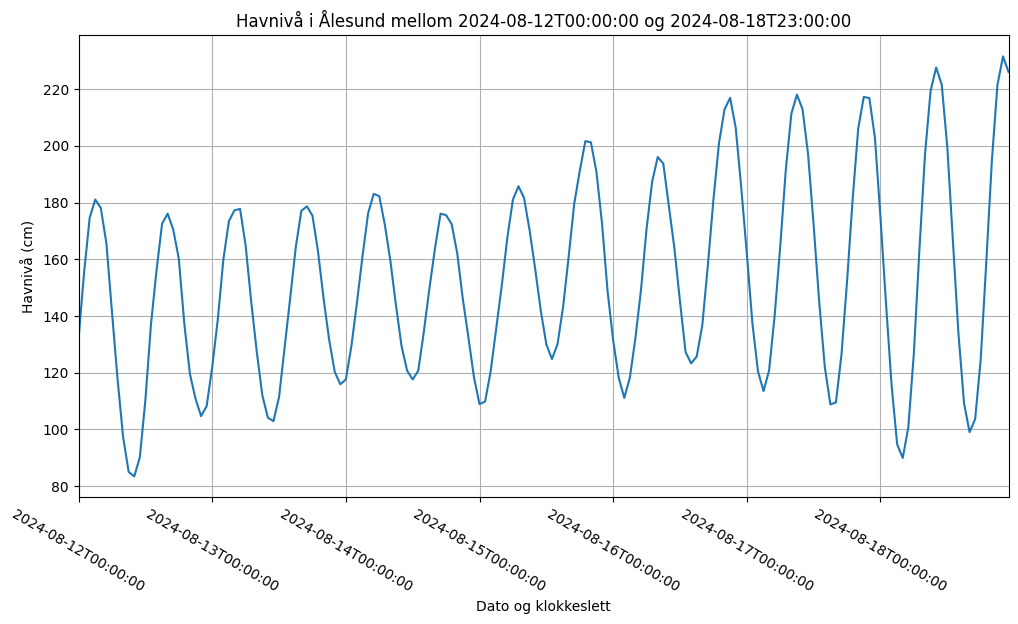

In [7]:
import pandas as pd
week_33_waterlevels_df = pd.read_csv("tidevannsdata_aalesund_uke33_2024.csv", sep=',')
week_33_waterlevels = list(pd.to_numeric(week_33_waterlevels_df['value']))
week_33_timestamps = list(week_33_waterlevels_df['time'])

# Kode for å lage plott av havnivå ut ifra klokkeslett.
plt.figure(figsize=(12,6))  # Sett opp en tom figur med bredde 16 og høyde 6
plt.plot(week_33_waterlevels)   # Plott tidevannsdata
xtick_interval = 24
plt.xticks(np.arange(0, len(week_33_timestamps), xtick_interval), 
           week_33_timestamps[::xtick_interval], 
           rotation=-30); # Merk x-aksen med klokkeslett
plt.margins(x=0) # Fjern marginene i x-retning
plt.grid(True)   # Slå på rutenett
plt.xlabel("Dato og klokkeslett")
plt.ylabel("Havnivå (cm)")
plt.title(f"Havnivå i Ålesund mellom {week_33_timestamps[0]} og {week_33_timestamps[-1]}")

For de spesielt interesserte, gjør kodecellen ovenfor følgende:
1. Importer biblioteket `pandas` med alias `pd`
2. Last inn tabellen med den innebygde funksjonen `pandas.read_csv()`. Denne trenger filnavnet som input, og ofte bør kolonneseparasjonstegnet (`,`) spesifiseres.
3. Hent ut kolonnen med navn `value`, og konverter dataen til en liste. Legg spesielt merke til at vi må konvertere dataen i kolonnen `value` til tallverdier med funksjonen `pandas.to_numeric()` da tall også skrives med tekstsymbol i en tekstfil, og man må fortelle python hvilke tekstsymbols som representerer tallverdier og hvilke som ikke gjør det.
4. Hent ut kolonnen med navn `time`, og konverter dataen til en liste. Tidsstemplene vil vi bevare som strenger.

<a id="oppg_8d"></a>
## d)
Bruk funksjonene fra deloppgave **c)** til å finne tidspunkt og målt havnivå for det høyeste og det laveste vannivået i uke 33, og skriv ut resultatet med bruk av `print()`.

In [9]:
#-------------------------------------
# SKRIV DIN KODE HER!
#-------------------------------------
min_value, time_at_min = get_min_info(week_33_waterlevels, week_33_timestamps)
max_value, time_at_max = get_max_info(week_33_waterlevels, week_33_timestamps)
print(f"Det laveste registrerte havnivået var {min_value} cm på tidspunktet {time_at_min}.")
print(f"Det høyeste registrerte havnivået var {max_value} cm på tidspunktet {time_at_max}.")


Det laveste registrerte havnivået var 83.4 cm på tidspunktet 2024-08-12T10:00:00.
Det høyeste registrerte havnivået var 231.6 cm på tidspunktet 2024-08-18T22:00:00.


<br>
<nav class="navbar navbar-default">
    <div class="container-fluid">
        <div class="navbar-header" style="float: left">
            <a class="navbar-brand" href="7_Plotting_2.ipynb" target="_self">&lt; Forrige side: <i>viderekommen plotting</i></a>
            </div>
        <div class="navbar-header" style="float: right">
            <a class="navbar-brand" href="9_Plotting_3.ipynb" target="_self">Neste side: <i>logaritmisk plotting</i> &gt;</a>
        </div>
    </div>
</nav>